In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

## Collect the dataset

In [2]:
# define dataset
df = pd.read_csv('data.csv')
# view dataset
df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [3]:
# column names have underscores and spaces both
# Engine fuel type and Transmission type are different , one has all caps and one is all small letters


In [4]:
# replace all spaces with underscores
# replace all caps with small letters

In [5]:
df.columns = df.columns.str.lower().str.replace(' ', '_') # lowercase all column names and replace spaces with underscores
string_columns = list(df.dtypes[df.dtypes == 'object'].index) # select only those columns with string values

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [6]:
df.head(5)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


#### description of dataset
make: make of a car (BMW, Toyota, and so on)

model: model of a car

year: year when the car was manufactured

engine_fuel_type: type of fuel the engine needs (diesel, electric, and so on)

engine_hp: horsepower of the engine

engine_cylinders: number of cylinders in the engine

transmission_type: type of transmission (automatic or manual)

driven_wheels: front, rear, all

number_of_doors: number of doors a car has

market_category: luxury, crossover, and so on

vehicle_size: compact, midsize, or large

vehicle_style: sedan or convertible

highway_mpg: miles per gallon (mpg) on the highway

city_mpg: miles per gallon in the city

popularity: number of times the car was mentioned in a Twitter stream

msrp: manufacturer’s suggested retail price

## Exploratory Data analysis

* The distribution of the target variable

In [7]:
# target variable is msrp
# checking distribution of target with a histogram

<AxesSubplot:xlabel='msrp', ylabel='Count'>

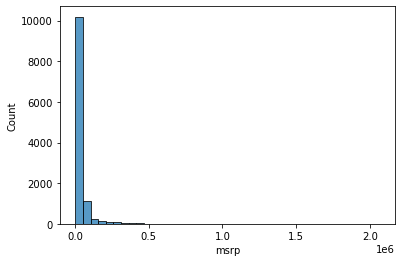

In [8]:
sns.histplot(df.msrp, bins=40)

#### Observation 1:
Many values at the low end of the price axis and almost nothing at the high end. This is a **long tail distribution**, which is a typical situation for many items with low prices and very few expensive ones.

<AxesSubplot:xlabel='msrp', ylabel='Count'>

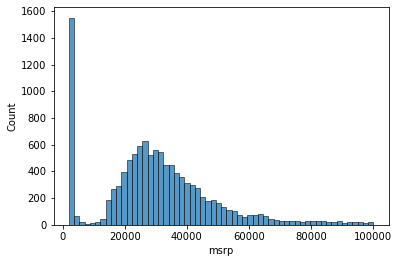

In [9]:
# to check msrp with less than 100K dollars
sns.histplot(df.msrp[df.msrp < 100000])

#### Observation 2:
The current distribution has stronger effect on model and model cant learn correctly.
So we do log transformation to solve this problem.

**Why only Log transformation ?**
https://datascience.stackexchange.com/questions/40089/what-is-the-reason-behind-taking-log-transformation-of-few-continuous-variables

"Mostly because of skewed distribution. Logarithm naturally reduces the dynamic range of a variable so the differences are preserved while the scale is not that dramatically skewed. Imagine some people got 100,000,000 loan and some got 10000 and some 0. Any feature scaling will probably put 0 and 10000 so close to each other as the biggest number anyway pushes the boundary. Logarithm solves the issue."

The logarithm of zero is minus infinity, but the logarithm of one is zero. If our values are all non-negative, by adding 1, we make sure that the transformed values do not go below zero.

In [10]:
# using log transformation
log_price = np.log(df.msrp)

<AxesSubplot:xlabel='msrp', ylabel='Count'>

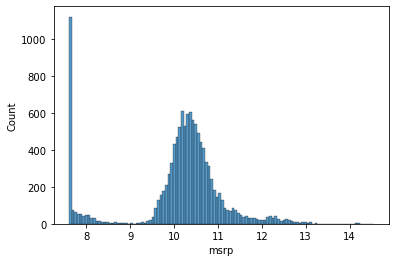

In [11]:
# now checking the histogram
sns.histplot(log_price)

# this gives NORMAL distribution

#### EDA : Step 2
* Checking for Missing values 

In [12]:
# check for missing values
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

## EDA steps PENDING!!

## Set up a validation strategy to make sure our model produces correct predictions.

* split the dataset into three parts: train, validation, and test

20% of data goes to validation.

20% goes to test.

The remaining 60% goes to train.

In [13]:
n = len(df)
n

11914

In [15]:
n_val = int(0.2 * n) # validation dataset length
n_test = int(0.2 * n) # test set length
n_train = n - (n_val + n_test)

In [16]:
# fixed random seed to make sure results are reproducible
np.random.seed(42)
# create numpy array with indices from 0 to (n-1) and shuffle it
idx = np.arange(n)
# use array with indices to get shuffled dataframe
np.random.shuffle(idx)

# df_shuffled dataframe will produce a shuffled dataframe compared to original df with indexes from 0 ,1,2,3..n
df_shuffled = df.iloc[idx] 

# now define train , test and validation sets

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [17]:
# now for target variable

# y_train_orig = df_train.msrp.values

# y_train = np.log1p(df_train.msrp.values)

# #y_validation = np.log1p(df_validation.msrp.values)
# #y_test = np.log1p(df_test.msrp.values)

In [18]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [19]:
# deleting the target variable so that we dont use it for training!
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

## Machine learning model for Regression

In [21]:
def train_linear_reg(X,y):
    ones = np.ones(X.shape[0])         
    X = np.column_stack([ones, X])     
   
    # normal equation formula
    XTX = X.T.dot(X)                   
    XTX_inv = np.linalg.inv(XTX)       
    w = XTX_inv.dot(X.T).dot(y)        

    return w[0], w[1:]      

In [22]:
# select the features from the data frame and write them to a new variable, df_num:

base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg',
        'popularity']
df_num = df_train[base]

In [23]:
# to deal with missing values replace the missing values with zeros with fillna method of pandas
# set the missing feature value to zero, the respective feature is simply ignored.
df_num = df_num.fillna(0)

In [24]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [26]:
X_train = prepare_X(df_train)
w_0, w = train_linear_reg(X_train, y_train)

In [27]:
y_pred = w_0 + X_train.dot(w)

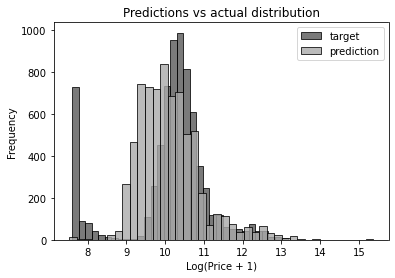

In [28]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

### Error Metric : RMSE

In [29]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [30]:
rmse(y_train, y_pred)

0.7570200472453602

In [31]:
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)

In [32]:
rmse(y_val, y_pred)

0.7398184285113428

### Validating the model

In [33]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [35]:
X_train = prepare_X(df_train)
w_0, w = train_linear_reg(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation', rmse(y_val, y_pred))

train 0.5182071904488224
validation 0.5133241025826359


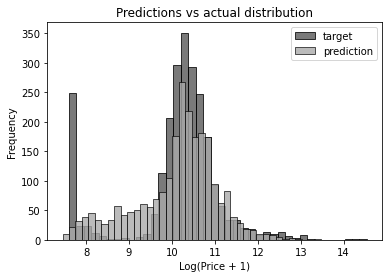

In [36]:
plt.figure(figsize=(6, 4))


sns.histplot(y_val, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [37]:
df['make'].value_counts().head(5)

chevrolet     1123
ford           881
volkswagen     809
toyota         746
dodge          626
Name: make, dtype: int64

In [38]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')

    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)

    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [40]:
X_train = prepare_X(df_train)
w_0, w = train_linear_reg(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train:', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

train: 0.507479557847297
validation: 0.5015149550252334


In [41]:
df['engine_fuel_type'].value_counts()

regular_unleaded                                7172
premium_unleaded_(required)                     2009
premium_unleaded_(recommended)                  1523
flex-fuel_(unleaded/e85)                         899
diesel                                           154
electric                                          66
flex-fuel_(premium_unleaded_required/e85)         54
flex-fuel_(premium_unleaded_recommended/e85)      26
flex-fuel_(unleaded/natural_gas)                   6
natural_gas                                        2
Name: engine_fuel_type, dtype: int64

In [42]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)

    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)

    for v in ['regular_unleaded', 'premium_unleaded_(required)', 
              'premium_unleaded_(recommended)', 'flex-fuel_(unleaded/e85)']:
        feature = 'is_type_%s' % v
        df[feature] = (df['engine_fuel_type'] == v).astype(int)
        features.append(feature)
        
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [43]:
X_train = prepare_X(df_train)
w_0, w = train_linear_reg(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train:', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

train: 0.47933612539387727
validation: 0.4721828900860986


In [44]:
df['transmission_type'].value_counts()

automatic           8266
manual              2935
automated_manual     626
direct_drive          68
unknown               19
Name: transmission_type, dtype: int64

In [45]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)

    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)

    for v in ['regular_unleaded', 'premium_unleaded_(required)', 
              'premium_unleaded_(recommended)', 'flex-fuel_(unleaded/e85)']:
        feature = 'is_type_%s' % v
        df[feature] = (df['engine_fuel_type'] == v).astype(int)
        features.append(feature)

    for v in ['automatic', 'manual', 'automated_manual']:
        feature = 'is_transmission_%s' % v
        df[feature] = (df['transmission_type'] == v).astype(int)
        features.append(feature)
        
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [47]:
X_train = prepare_X(df_train)
w_0, w = train_linear_reg(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train:', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

train: 0.473618266477087
validation: 0.4680794739571143


In [48]:
w_0

11.868586243364616

## Regularization

In [49]:
def train_linear_reg_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [50]:
X_train = prepare_X(df_train)

In [53]:
for r in [0, 0.001, 0.01, 0.1, 1, 10]:
    w_0, w = train_linear_reg_reg(X_train, y_train, r=r)
    print('%5s, %.2f, %.2f, %.2f' % (r, w_0, w[13], w[19]))

    0, 11.87, -0.12, -0.60
0.001, 11.86, -0.12, -0.60
 0.01, 11.82, -0.12, -0.60
  0.1, 11.44, -0.12, -0.56
    1, 9.39, -0.11, -0.23
   10, 6.05, -0.10, 0.94


In [54]:
X_train = prepare_X(df_train)
w_0, w = train_linear_reg_reg(X_train, y_train, r=0)

y_pred = w_0 + X_train.dot(w)
print('train', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('val', rmse(y_val, y_pred))

train 0.473618266477087
val 0.4680794739571143


## Using the model


In [55]:
i = 2
ad = df_test.iloc[i].to_dict()
ad

{'make': 'ford',
 'model': 'f-150',
 'year': 2016,
 'engine_fuel_type': 'flex-fuel_(unleaded/e85)',
 'engine_hp': 282.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'four_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': 'flex_fuel',
 'vehicle_size': 'large',
 'vehicle_style': 'crew_cab_pickup',
 'highway_mpg': 23,
 'city_mpg': 17,
 'popularity': 5657}